In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")


/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
data=pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
data.shape

(7728394, 46)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


Text(0.5, 0, 'Attributes')

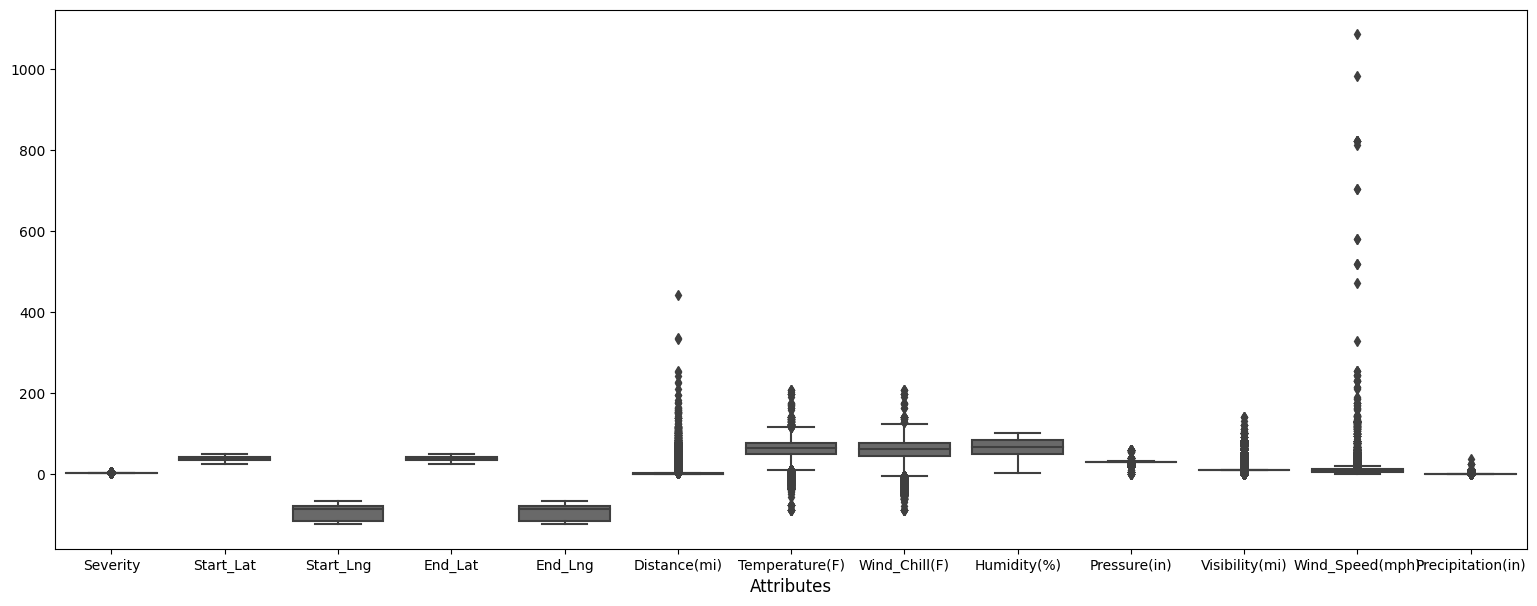

In [6]:
plt.figure(figsize=(19, 7))
sns.boxplot(data=data.select_dtypes(include=["int64","float64"]),color="dimgray")
plt.xlabel("Attributes",fontsize=12)


In [7]:
#checking for missing values as percentages
missing_perc=(data.isnull().sum()/len(data))*100
missing_perc

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

Text(0, 0.5, 'Attributes')

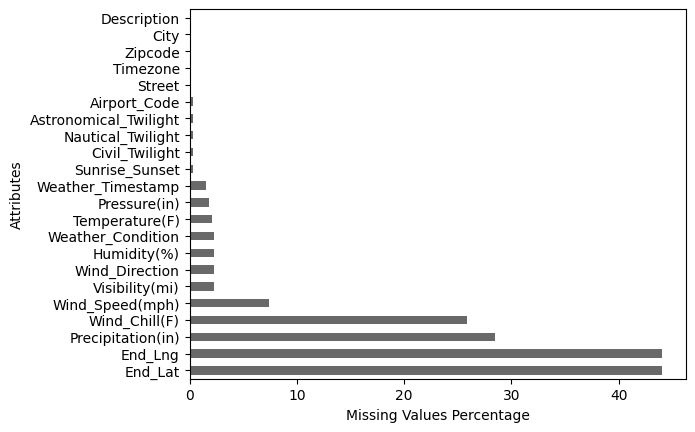

In [8]:
#plotting the above
missing_perc[missing_perc!=0].sort_values(ascending=False).plot(kind="barh", color="dimgrey") 
plt.xlabel("Missing Values Percentage")
plt.ylabel("Attributes")

In [9]:
#removing not useful columns

# cols_to_remove=['ID', 'Source','End_Time','End_Lat','End_Lng','Distance(mi)', 'Description',
#         'County', 'Zipcode','Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
#          'Pressure(in)',  'Wind_Direction','Civil_Twilight', 'Nautical_Twilight',
#         'Astronomical_Twilight']
# data=data.drop(cols_to_remove,axis=1)


In [10]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


### Analyzing accidents by Street, City, State, & Country

In [11]:
data_by_street=data.Street
by_street_accidents=data_by_street.value_counts().sort_values(ascending=False)

#how many streets have more than 1000 accidents?
by_street_accidents[by_street_accidents >= 1000]

#percentage
((by_street_accidents[by_street_accidents >= 1000].count()/data_by_street.nunique())*100).round(2)

0.24

In [12]:
data_by_city=data.City
by_city_accidents=data_by_city.value_counts().sort_values(ascending=False)

#how many cities have more than 1000 accidents?
by_city_accidents[by_city_accidents >= 1000].count()

#percentage
((by_city_accidents[by_city_accidents >= 1000].count()/data_by_city.nunique())*100).round(2)


8.9

In [13]:
data_by_state=data.State
by_state_accidents=data_by_state.value_counts().sort_values(ascending=False)

#how many cities have more than 1000 accidents?
by_state_accidents[by_state_accidents >= 1000].count()

#percentage
((by_state_accidents[by_state_accidents >= 1000].count()/data_by_state.nunique())*100).round(2)

95.92

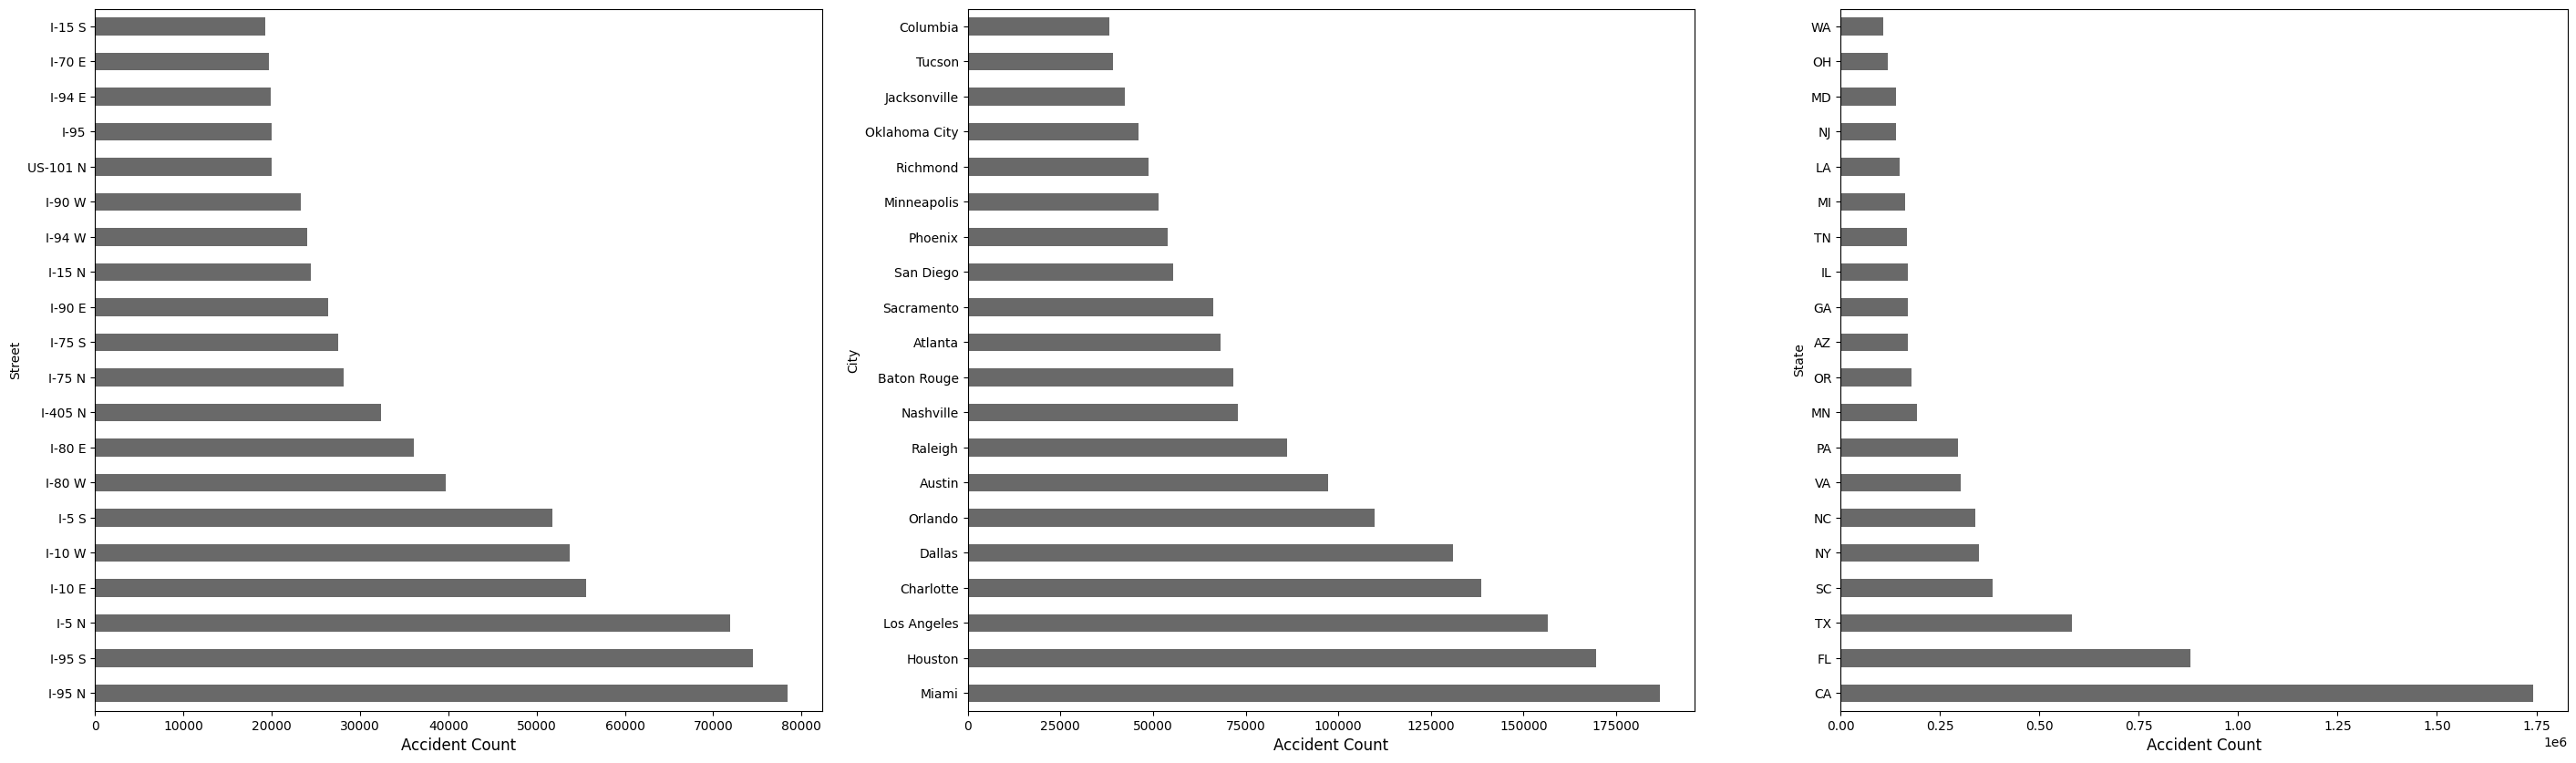

In [14]:
plt.figure(figsize=(35,10))

plt.subplot(1,3,1)
by_street_accidents[:20].plot(kind="barh",color="dimgray")
plt.xlabel("Accident Count",fontsize=12)

plt.subplot(1,3,2)
by_city_accidents[:20].plot(kind="barh", color="dimgray")
plt.xlabel("Accident Count",fontsize=12)


plt.subplot(1,3,3)
by_state_accidents[:20].plot(kind="barh", color="dimgray")
plt.xlabel("Accident Count",fontsize=12)


plt.show()


Insights:
1. Miami has the highest no. of accidents accounting for 2% of the total cases
2. The top 5 cities with most cases of accidents are (in descending order): 

    Miami                         
    Houston                        
    Los Angeles                   
    Charlotte                   
    Dallas

    contributing to 10% of the total accident cases

### Analyzing the "Severity" column


According to the description provided with the dataset, severity refers to the impact the accident had on the traffic, by
a number between 1 and 4, where 1 indicates the least impact on traffic.

In [15]:
d=pd.DataFrame(data.Severity.value_counts()).reset_index()
d

,Severity,count
0,2,6156981
1,3,1299337
2,4,204710
3,1,67366


Text(0, 0.5, 'No. of accidents (in millions)')

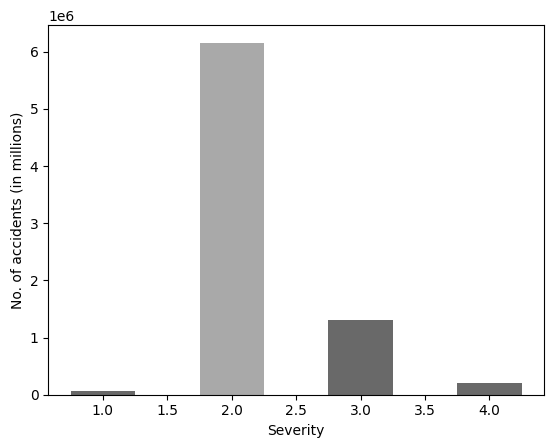

In [16]:
plt.bar(d["Severity"],d["count"],width=0.5,color=["darkgray","dimgrey","dimgray","dimgray"])
plt.xlabel("Severity")
plt.ylabel("No. of accidents (in millions)")

In [17]:
((d[d["Severity"]==4]["count"]/data.shape[0])*100).round(2)

2    2.65
Name: count, dtype: float64

So about 2.65% of the accidents suffered severe impact on traffic (Severity = 4).

### Analyzing Time related columns

In [18]:
#formatting the column
data.Start_Time=pd.to_datetime(data.Start_Time, format="mixed",yearfirst= True)

In [19]:
#yearly trends
date_year=data["Start_Time"].dt.year
date_year=pd.DataFrame(date_year.value_counts()).reset_index().sort_values(by=["Start_Time"])
date_year

,Start_Time,count
6,2016,410821
5,2017,718093
4,2018,893426
3,2019,954303
2,2020,1178913
1,2021,1563753
0,2022,1762452
7,2023,246633


Text(0, 0.5, 'Count')

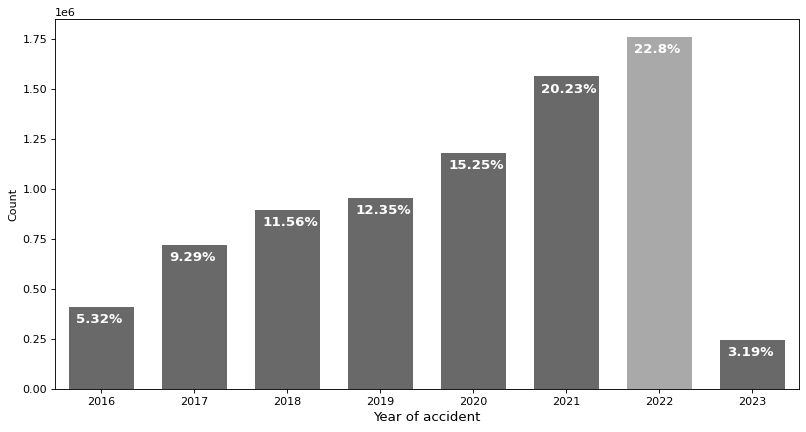

In [20]:
#plotting
# plt.bar(date_year["Start_Time"], date_year["count"])
# plt.xlabel("Year of accident")
# plt.ylabel("Count")
# plt.show()


fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=date_year['count'], x=date_year['Start_Time'],
               palette=["dimgray","dimgray","dimgray","dimgray","dimgray","dimgray","darkgray"],
               width=0.7)

total = data.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.08, i.get_height()-80000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,weight='bold',
                color='white')

plt.xlabel("Year of accident",fontsize=12)
plt.ylabel("Count")
    

In [21]:
#checking for the amount of available data for the year 2023
df=data[data["Start_Time"].dt.year==2023]
df["Start_Time"].dt.month.value_counts()


#so for the year 2023 , data was only available till the month March

Start_Time
1    160914
2     55532
3     30187
Name: count, dtype: int64

In [22]:
da=data[data["Start_Time"].dt.year!=2023]
da["Start_Time"].dt.year.value_counts()

Start_Time
2022    1762452
2021    1563753
2020    1178913
2019     954303
2018     893426
2017     718093
2016     410821
Name: count, dtype: int64

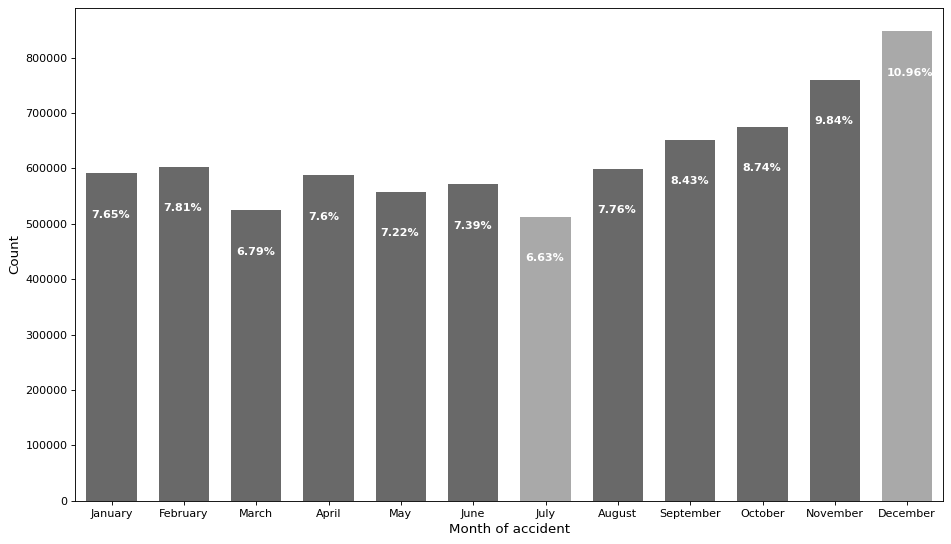

In [23]:
#monthly trend
date_month=da["Start_Time"].dt.month
date_month=pd.DataFrame(date_month.value_counts()).reset_index().sort_values(by=["Start_Time"])


fig, ax = plt.subplots(figsize = (14,8), dpi = 80)

ax=sns.barplot(y=date_month['count'], x=date_month['Start_Time'],
               palette=["dimgray","dimgray","dimgray","dimgray","dimgray","dimgray","darkgray",
                       "dimgray","dimgray","dimgray","dimgray","darkgray"],
               width=0.7)

total = data.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.07, i.get_height()-80000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,weight='bold',
                color='white')

plt.xlabel("Month of accident",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11]
    ,labels=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.show()

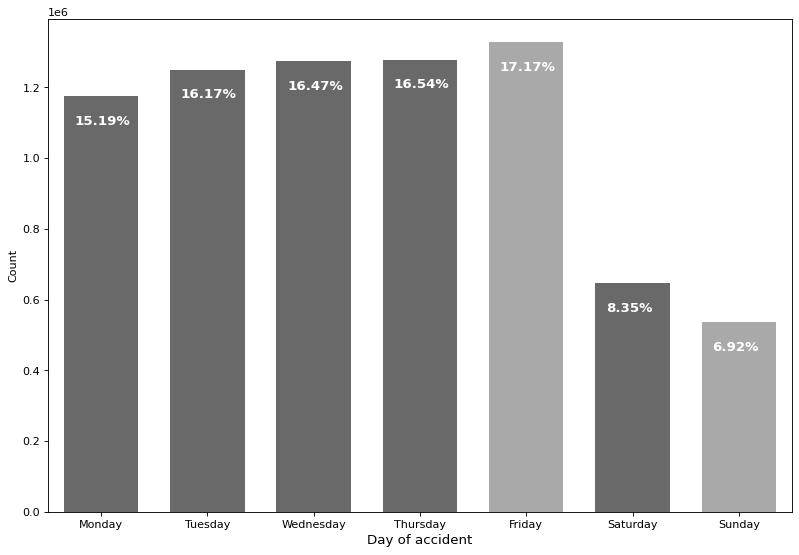

In [24]:
#weekly trend
date_week=da["Start_Time"].dt.dayofweek
date_week=pd.DataFrame(date_week.value_counts()).reset_index()

fig, ax = plt.subplots(figsize = (12,8), dpi = 80)

ax=sns.barplot(y=date_week['count'], x=date_week['Start_Time'],
               palette=["dimgray","dimgray","dimgray","dimgray","darkgray","dimgray","darkgray"],width=0.7)

total = data.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-80000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,weight='bold',
                color='white')

plt.xlabel("Day of accident",fontsize=12)
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2,3,4,5,6]
    ,labels=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.show()


Text(0, 0.5, 'Count')

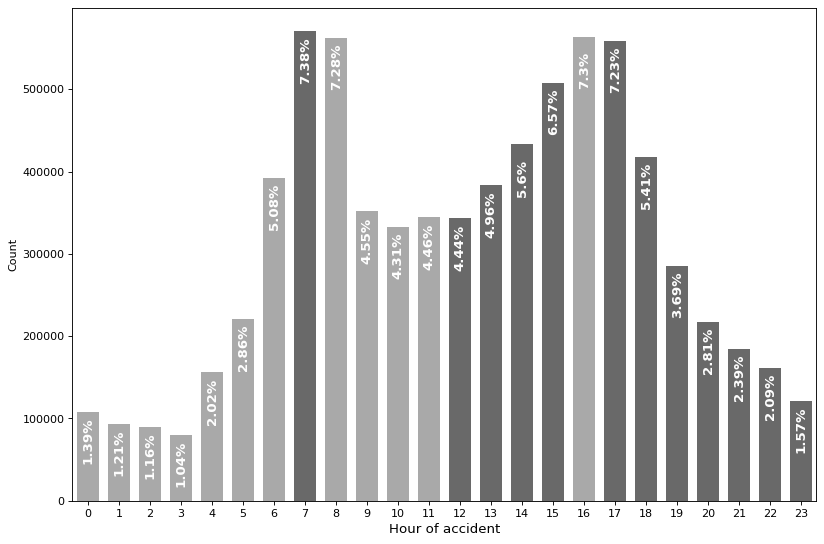

In [25]:
#hourly trend
date_hour=da["Start_Time"].dt.hour
date_hour=pd.DataFrame(date_hour.value_counts()).reset_index().sort_values(by=["Start_Time"])

colors=[]
for i in date_hour.iterrows():
    if i[1][0]<=11:
        if i[1][1]==max(list(date_hour["count"])[:12]):
            colors.append("dimgrey")
        else:
            colors.append("darkgrey")
    else:
        if i[1][1]==max(list(date_hour["count"])[12:]):
            colors.append("darkgrey")
        else:
            colors.append("dimgrey")
    
   
# print(date_hour[date_hour["Start_Time"]==0]["count"])

fig, ax = plt.subplots(figsize = (12,8), dpi = 80)

ax=sns.barplot(y=date_hour['count'], x=date_hour['Start_Time'],palette=colors,width=0.7)

total = data.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()-60000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,weight='bold',
                color='white',rotation='vertical')

plt.xlabel("Hour of accident",fontsize=12)
plt.ylabel("Count")



<Axes: xlabel='Start_Time', ylabel='Count'>

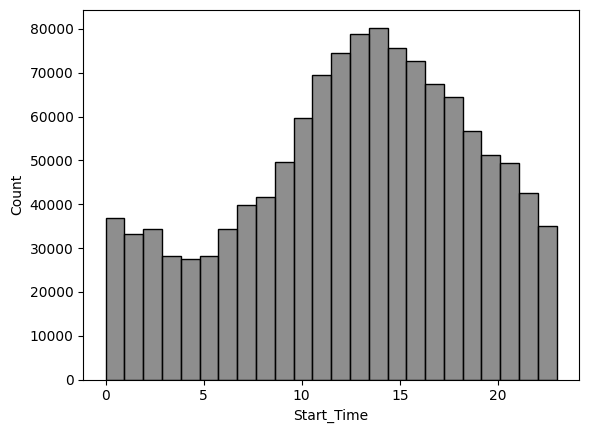

In [26]:
#trend during the weekends
data_weekends=data[data.Start_Time.dt.dayofweek>4]
sns.histplot(data=data_weekends, x=data_weekends.Start_Time.dt.hour, bins=24,color="dimgrey")

<Axes: xlabel='Start_Time', ylabel='Count'>

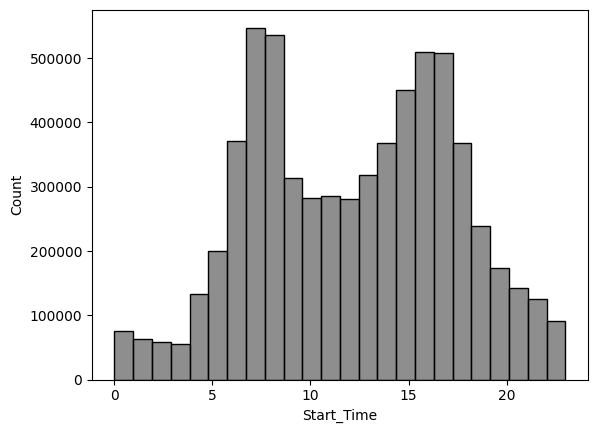

In [27]:
#and on weekdays
data_weekdays=data[data.Start_Time.dt.dayofweek<=4]
sns.histplot(data=data_weekdays, x=data_weekdays.Start_Time.dt.hour, bins=24, color="dimgrey")

Conclusion:
1. Most accidents happened between the years 2021 and 2023.
2. Accidents happened mostly between 6 A.M. to 10 A.M. and 1 P.M. to 6 P.M., probably due to the rush to get to work.
3. Also accidents were more during weekdays than weekends, that too due to similar reason as above.
4. On weekdays most accidents occured between 6 A.M. to 10 A.M. and 1 P.M. to 6 P.M., while on weekends number of accidents had a gradual increase during the afternoon hours, between 10 A.M. and 6 P.M.

### Analyzing column: Visibility(mi)

The maximum distance at which a driver can clearly see objects on the road.
A high visibility reading (e.g., 10 miles or greater) indicates clear conditions, while a low reading (e.g., 1 mile) signifies poor visibility due to atmospheric obstructions.

Visibility greater than 10 miles is excellent 

In [28]:
visibility=pd.DataFrame(da["Visibility(mi)"].value_counts()).reset_index()



high_visibility=visibility[visibility["Visibility(mi)"]>=9]["count"].sum()
moderate_visibility=visibility[(visibility["Visibility(mi)"] >= 3) & (visibility["Visibility(mi)"] < 9)]["count"].sum()
low_visibility=visibility[visibility["Visibility(mi)"]<3]["count"].sum()

high_visibility,moderate_visibility,low_visibility 


#upto 10 miles was the visibility , which is considered excellent as per sources.
#so in most of the accidents visibility was good, hence cannot be considered as a factor

(6108067, 841049, 362415)

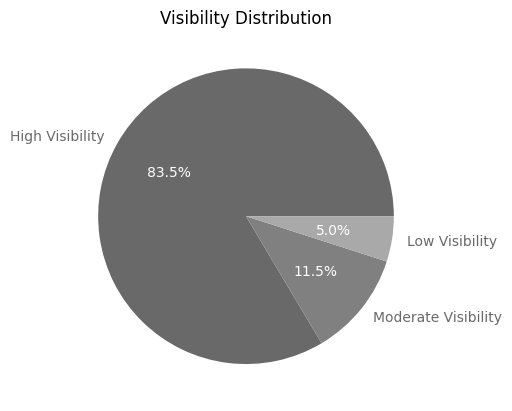

In [29]:
y=[high_visibility,moderate_visibility,low_visibility]
wedges, texts, autotexts=plt.pie(y,labels=["High Visibility","Moderate Visibility","Low Visibility"],
        autopct='%1.1f%%',colors=["dimgray","gray","darkgray"])

for autotext in autotexts:
    autotext.set_color("white")

for text in texts:
    text.set_color("dimgray")

plt.title("Visibility Distribution")
    
plt.show()

### Analyzing the weather conditions
Thereby the columns: "Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Precipitation(in)"

"Wind Speed" column was highly skewed

In [30]:
x=["Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Precipitation(in)"] 

In [31]:
df=pd.DataFrame(da["Temperature(F)"].value_counts()).reset_index()
df.sort_values(by="Temperature(F)", ascending=False)

,Temperature(F),count
853,203.0,1
746,196.0,5
856,189.0,1
811,174.0,2
789,172.0,2
...,...,...
819,-45.0,1
835,-50.0,1
814,-58.0,1
705,-77.8,11


In [32]:
def plot_env(df, c, x):
    df=pd.DataFrame(df[c].value_counts()).reset_index()
    min_ = int(np.floor(df[f"{c}"].min() / x) * x)  # Round down to nearest multiple of 20
    max_ = int(np.ceil(df[f"{c}"].max() / x) * x)  # Round up to nearest multiple of 20
    
    bins = list(range(min_, max_ + x, x))  # Create bins from min to max 
    labels = [f"{bins[i]} to {bins[i+1]}" for i in range(len(bins) - 1)]  # Label bins
    
   
    df["Bins"] = pd.cut(df[f"{c}"], bins=bins, labels=labels, include_lowest=True)
    
   
    x_accident_counts = df.groupby("Bins")["count"].sum().reset_index()

    total_accidents = x_accident_counts["count"].sum()
    x_accident_counts["Percentage"] = (x_accident_counts["count"] / total_accidents) * 100

    

    colors=[]
    for i in x_accident_counts.iterrows():
        
        if i[1][2]==max(list(x_accident_counts["Percentage"])):
            colors.append("darkgrey")
        else:
            colors.append("dimgrey")

    

    
    plt.figure(figsize=(10, 7))
    bars=plt.bar(x_accident_counts["Bins"], x_accident_counts["count"], color=colors)
    
    total = df.shape[0]

    for bar, pct in zip(bars, x_accident_counts["Percentage"]):    
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +30000, f"{pct:.2f}%", ha='center', fontsize=7, weight='bold')

    
    # Labeling
    plt.xlabel(f"{c}")
    plt.ylabel("Count of Accidents")
    plt.title(f"Accident Count vs. {c}")
    plt.xticks(rotation=90) 
   
    
    # Show the plot
    plt.show()

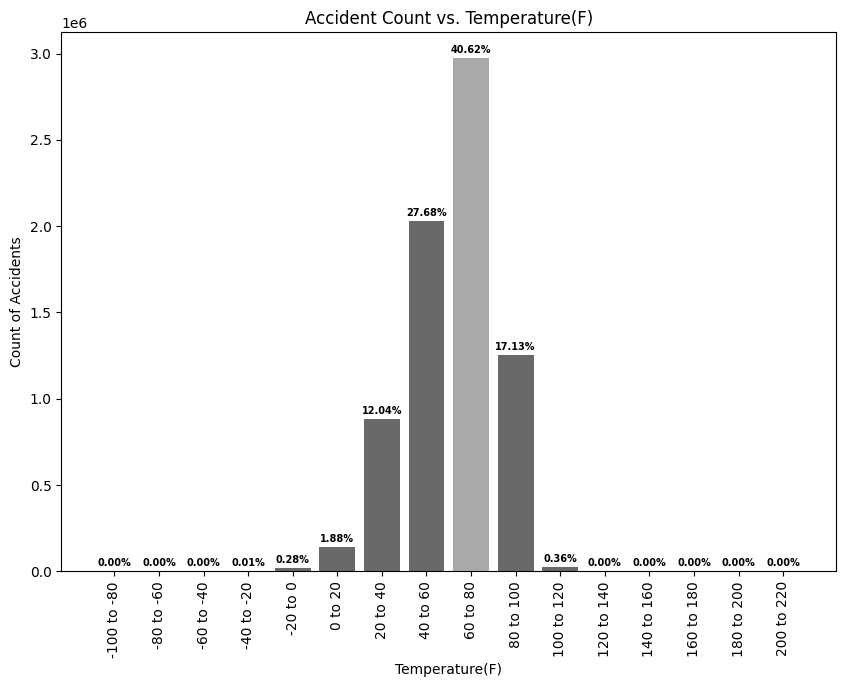

In [33]:
plot_env(da, "Temperature(F)", 20)

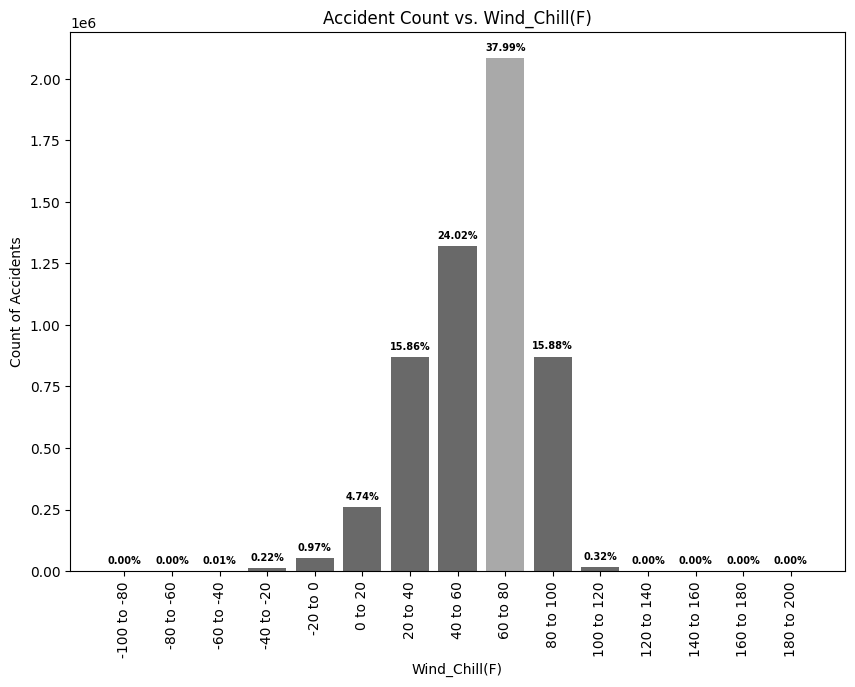

In [34]:
plot_env(da, "Wind_Chill(F)", 20)

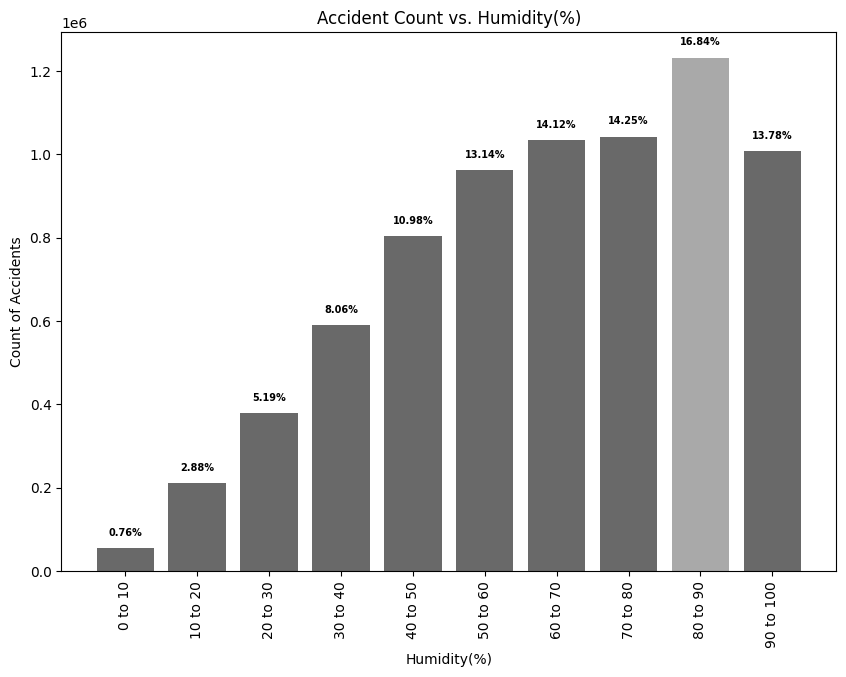

In [35]:
plot_env(da, "Humidity(%)", 10)

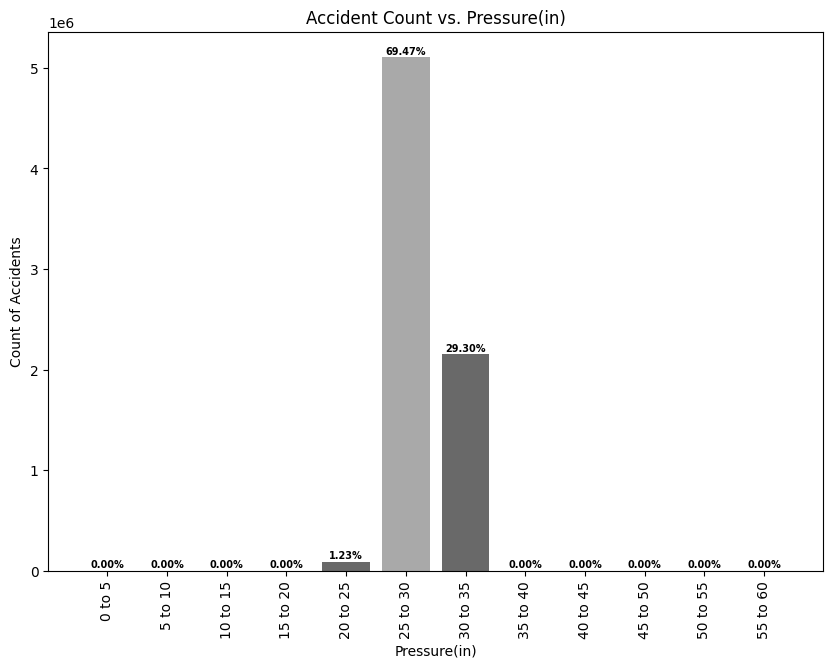

In [36]:
plot_env(da, "Pressure(in)", 5)

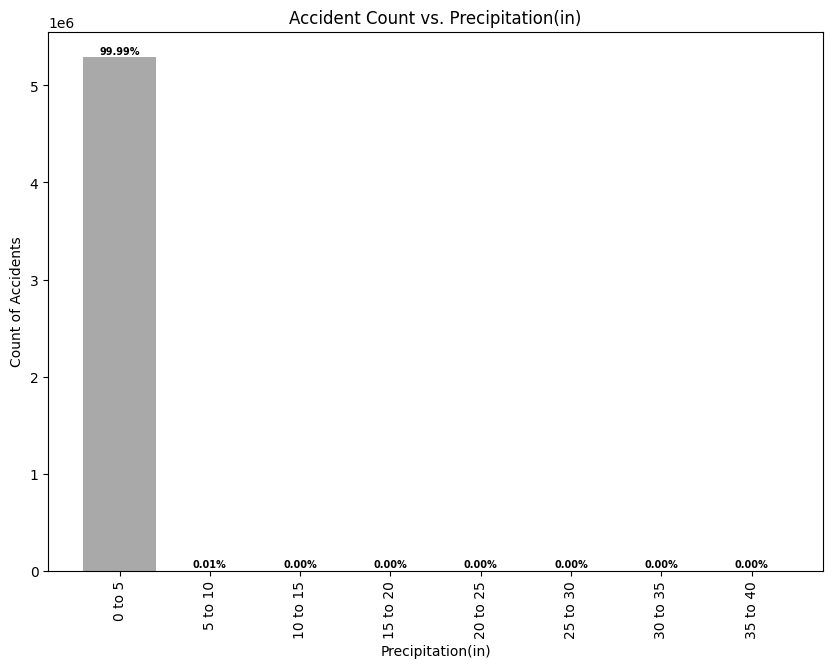

In [37]:
plot_env(da, "Precipitation(in)", 5)

<Axes: >

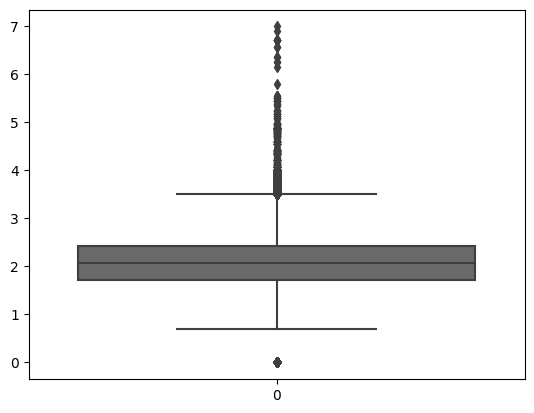

In [38]:
# wind speed is highly skewed and on normalizing too , many outliers are still relevant
sns.boxplot(da["Wind_Speed(mph)"].apply(np.log1p), color="dimgrey")
# accidents["LogWindSpeed"] = da.Wind_Speed(mph).apply(np.log1p)

In [39]:
# pd.set_option("display.max_rows",None)
weather_val=da.Weather_Condition.value_counts()

In [40]:
weather_val=pd.DataFrame(weather_val, index=None)
weather_val=weather_val.reset_index()
weather_val

,Weather_Condition,count
0,Fair,2463598
1,Mostly Cloudy,990247
2,Clear,808743
3,Cloudy,769429
4,Partly Cloudy,685487
...,...,...
137,Heavy Sleet and Thunder,1
138,Heavy Freezing Rain / Windy,1
139,Heavy Smoke,1
140,Partial Fog / Windy,1


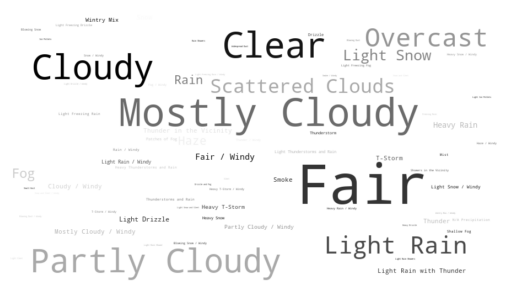

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 


word_frequencies = dict(zip(weather_val["Weather_Condition"], weather_val["count"]))

# Create and generate a word cloud image:
wordcloud = WordCloud(width=900, height=500, 
    background_color="white",  # Light background
    colormap="binary",  # Darker words for contrast
    max_font_size=100,  # Larger max font size for clarity
    prefer_horizontal=1.0 ).generate_from_frequencies(word_frequencies)

# Display the generated image:
# plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
labels=[i for i in weather_val["Weather_Condition"]]
len(labels)

142

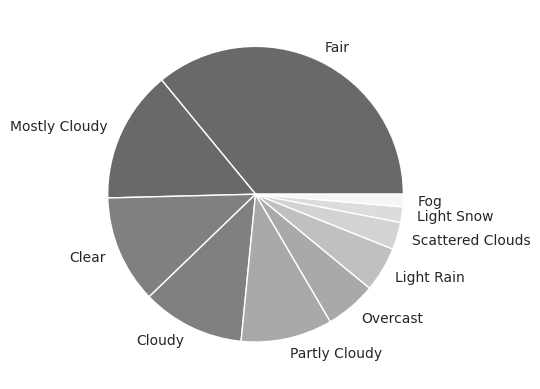

In [43]:
#what was the weather condition for most accidents
sns.set_style("darkgrid")

plt.pie(weather_val["count"].head(10),labels=labels[:10],colors=["dimgray","dimgrey","gray","grey","darkgray","darkgrey","silver","lightgray","gainsboro","whitesmoke"])
plt.show()
#weather conditions were fair, mostly cloudy, clear or cloudy for most of the cases

In [44]:
##at what time day or night did accidents happen the most
day_or_night=pd.DataFrame(da.Sunrise_Sunset.value_counts()).reset_index()
#daytime accounts for most of the accidents
day_or_night

,Sunrise_Sunset,count
0,Day,5187539
1,Night,2272651


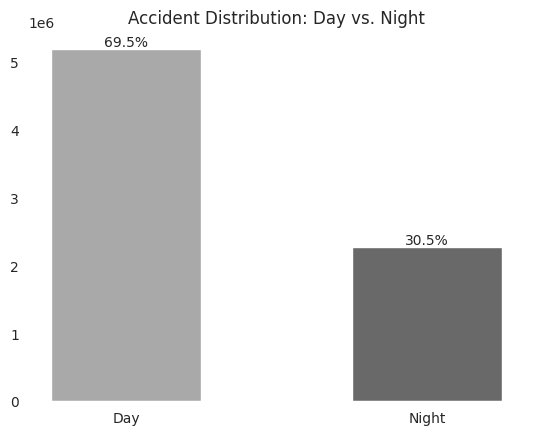

In [45]:
fig,ax=plt.subplots()
container=ax.bar(day_or_night["Sunrise_Sunset"],day_or_night["count"], width=0.5, color=["darkgrey","dimgrey"])
plt.title("Accident Distribution: Day vs. Night")
ax.set_facecolor("white")
ax.bar_label(container,fmt=lambda x: f'{(x / day_or_night["count"].sum())*100:.1f}%')
plt.show()


In [46]:
roadway_features = ["Amenity", "Bump", "Crossing", "Give_Way",
    "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop",
    "Traffic_Calming", "Traffic_Signal",'Turning_Loop']

for i in roadway_features:
    print(da[i].value_counts())



# data.RoadwayFeatures.value_counts()
# accidents[roadway_features + ["RoadwayFeatures"]].head(10)
#areas with most accidents had no features as such

Amenity
False    7387571
True       94190
Name: count, dtype: int64
Bump
False    7478386
True        3375
Name: count, dtype: int64
Crossing
False    6625910
True      855851
Name: count, dtype: int64
Give_Way
False    7445951
True       35810
Name: count, dtype: int64
Junction
False    6928639
True      553122
Name: count, dtype: int64
No_Exit
False    7462681
True       19080
Name: count, dtype: int64
Railway
False    7416529
True       65232
Name: count, dtype: int64
Roundabout
False    7481522
True         239
Name: count, dtype: int64
Station
False    7284315
True      197446
Name: count, dtype: int64
Stop
False    7272984
True      208777
Name: count, dtype: int64
Traffic_Calming
False    7474394
True        7367
Name: count, dtype: int64
Traffic_Signal
False    6359345
True     1122416
Name: count, dtype: int64
Turning_Loop
False    7481761
Name: count, dtype: int64


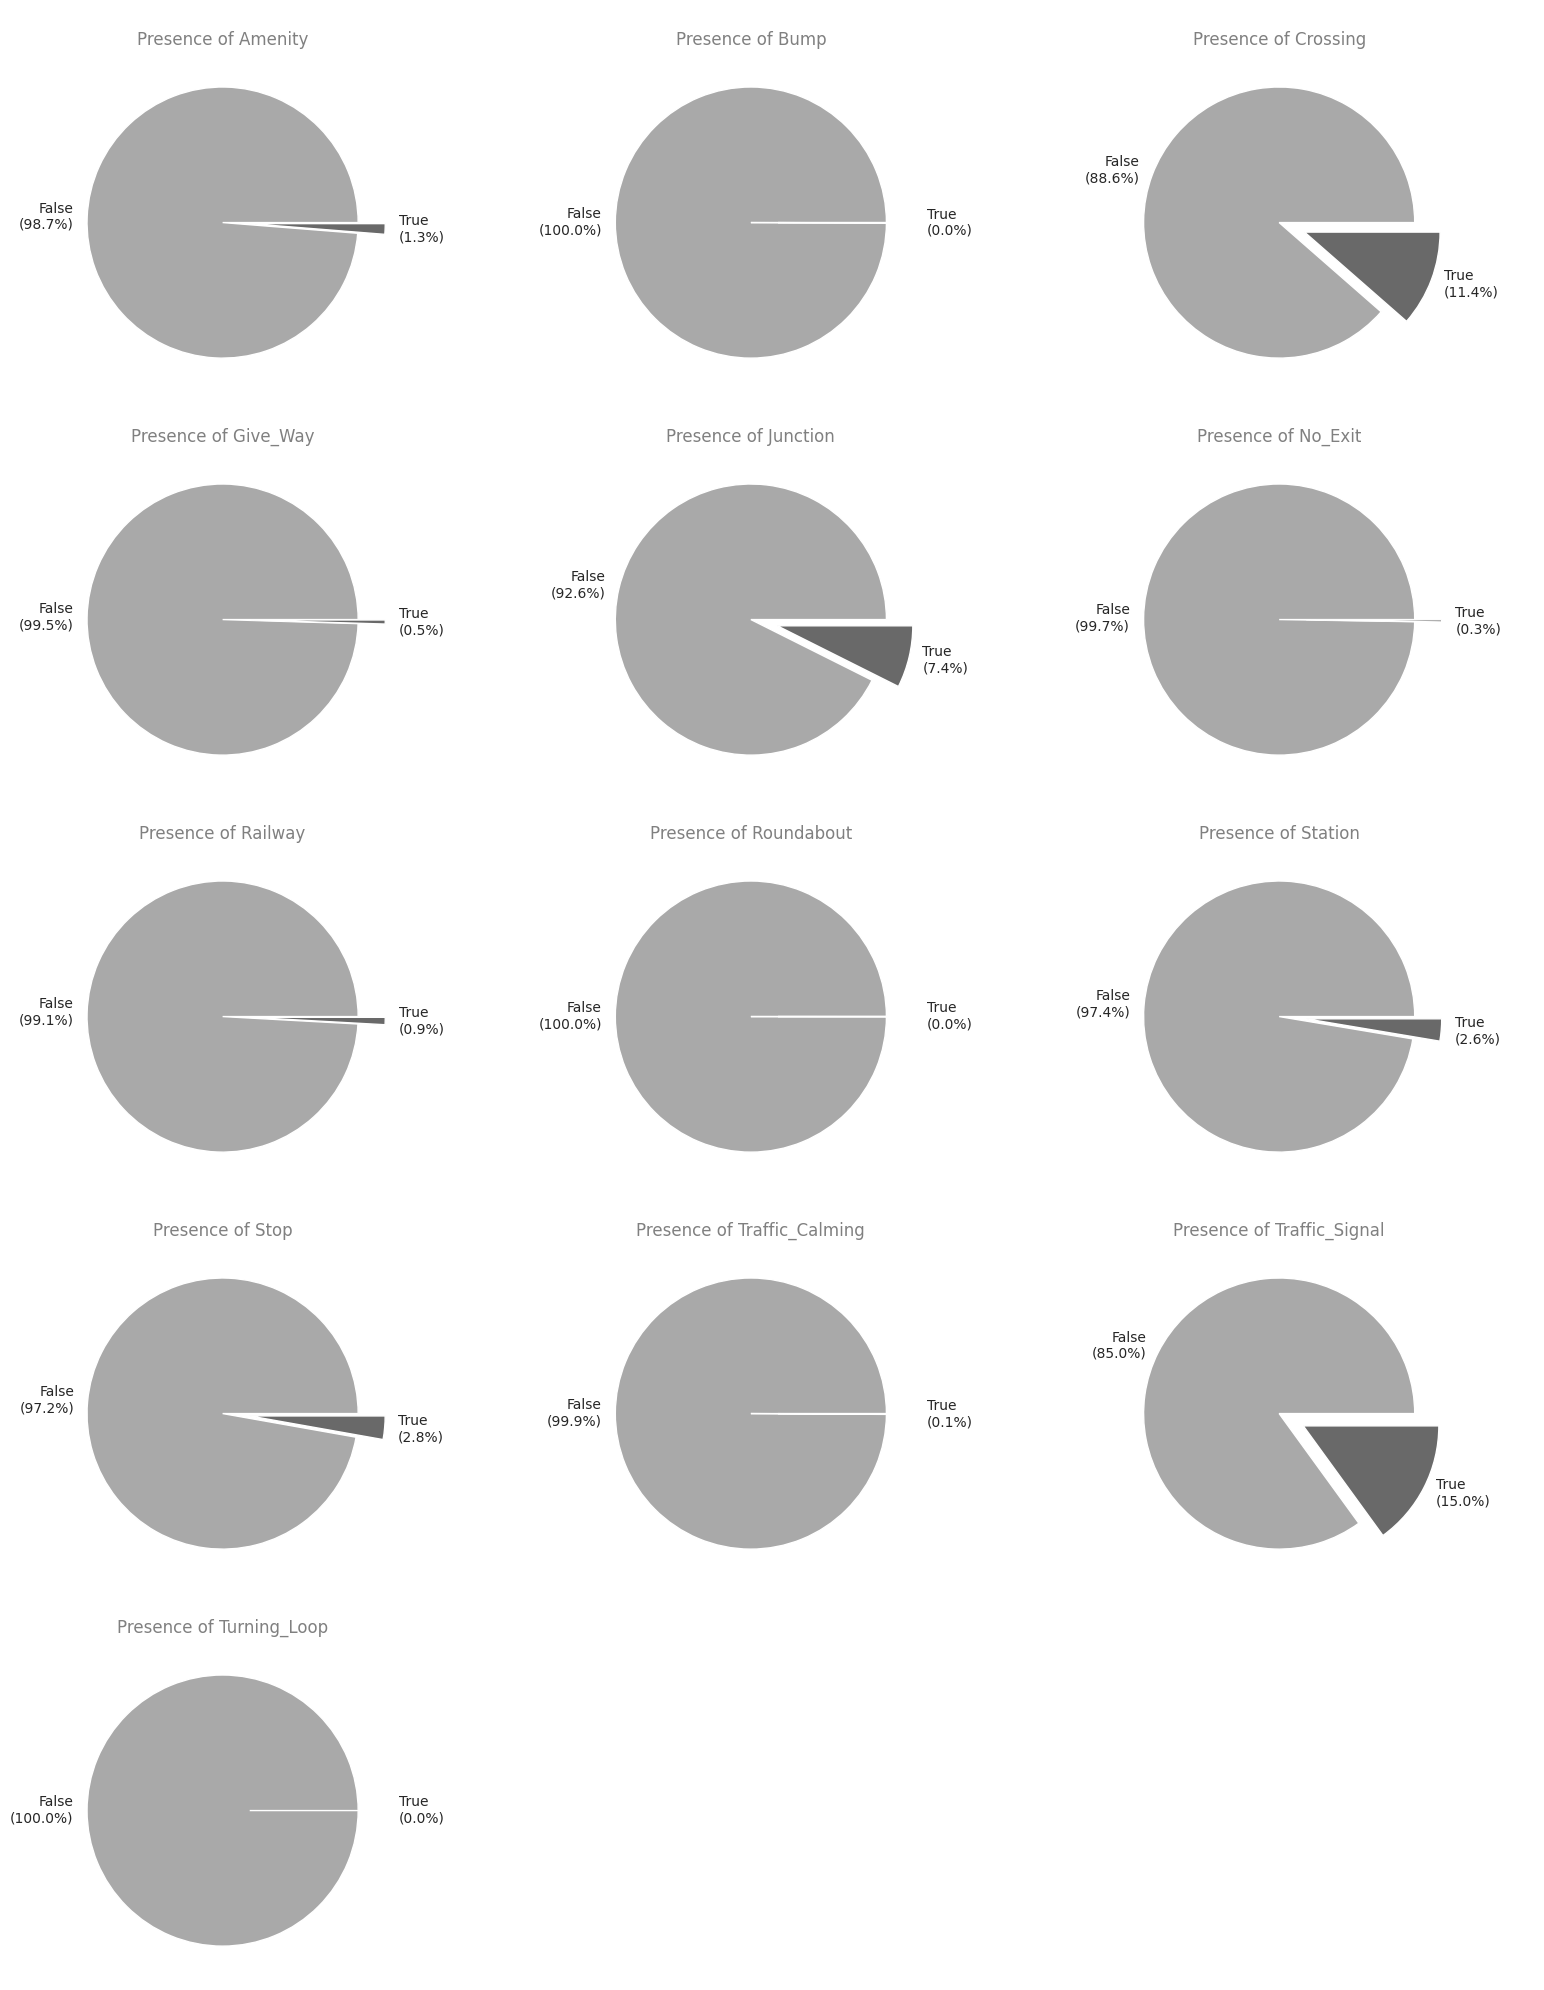

In [47]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
axes = axes.flatten()

colors = [("darkgrey", "dimgrey")] * len(roadway_features)

# Custom function to format autopct as part of label
def format_labels(size):
    total = sum(size)
    labels = []
    for val in size:
        pct = (val / total) * 100 if total > 0 else 0
        labels.append(f"{'False' if len(labels)==0 else 'True'}\n({pct:.1f}%)")
    return labels

for i, feature in enumerate(roadway_features):
    size = list(da[feature].value_counts())
    if len(size) != 2:
        size.append(0)

    labels = format_labels(size)

    axes[i].pie(
        size,
        labels=labels,
        colors=colors[i],
        labeldistance=1.1,
        textprops={'fontsize': 10},
        explode=[0, 0.2]
    )
    axes[i].set_title(f'\nPresence of {feature}', fontsize=12, color='grey')

# Hide any unused subplots
for i in range(len(roadway_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
